In [33]:
import numpy as np
import cv2
from matchPics import matchPics
from helper import plotMatches
import scipy.io as sio
from matplotlib import pyplot as plt
import skimage.feature
PATCHWIDTH = 9

def briefMatch(desc1,desc2,ratio=0.8):
	matches = skimage.feature.match_descriptors(desc1,desc2,'hamming',cross_check=True,max_ratio=ratio)
	return matches

def plotMatches(im1,im2,matches,locs1,locs2):
	fig, ax = plt.subplots(nrows=1, ncols=1)
	im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
	im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
	plt.axis('off')
	skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,only_matches=True)
	plt.show()
	return

def makeTestPattern(patchWidth, nbits):
	np.random.seed(0)
	compareX = patchWidth*patchWidth * np.random.random((nbits,1))
	compareX = np.floor(compareX).astype(int)
	np.random.seed(1)
	compareY = patchWidth*patchWidth * np.random.random((nbits,1))
	compareY = np.floor(compareY).astype(int)

	return (compareX, compareY)

def computePixel(img, idx1, idx2, width, center):
	halfWidth = width // 2
	col1 = idx1 % width - halfWidth
	row1 = idx1 // width - halfWidth
	col2 = idx2 % width - halfWidth
	row2 = idx2 // width - halfWidth
	return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


def computeBrief(img, locs):
	patchWidth = 9
	nbits = 256
	compareX, compareY = makeTestPattern(patchWidth,nbits)
	m, n = img.shape

	halfWidth = patchWidth//2
	
	locs = np.array(list(filter(lambda x: halfWidth <= x[0] < m-halfWidth and halfWidth <= x[1] < n-halfWidth, locs)))
	desc = np.array([list(map(lambda x: computePixel(img, x[0], x[1], patchWidth, c), zip(compareX, compareY))) for c in locs])
	
	return desc, locs
	


def corner_detection(im, sigma=1.5):
	# fast method
	result_img = skimage.feature.corner_fast(im, PATCHWIDTH)
	locs = skimage.feature.corner_peaks(result_img, min_distance=1)
	return locs

def matchPics(I1, I2):
    # I1, I2: Images to match
    
    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)
    
    # Detect Features in Both Images
    locs1 = corner_detection(I1_gray)
    locs2 = corner_detection(I2_gray)
    
    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, locs1)
    desc2, locs2 = computeBrief(I2_gray, locs2)
    
    # Match features using the descriptors
    matches = briefMatch(desc1, desc2)
    
    return matches, locs1, locs2




In [42]:
# Q6
# Read the image and convert to grayscale, if necessary
cv_cover = cv2.imread('../data/cv_cover.jpg')


0
10


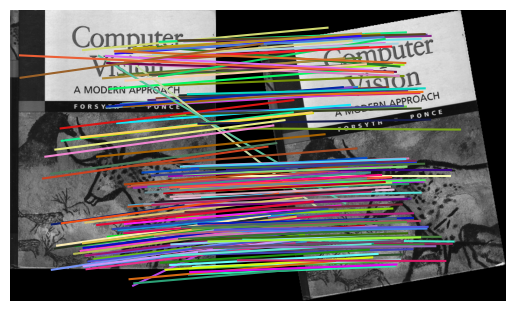

20
30
40
50
60
70


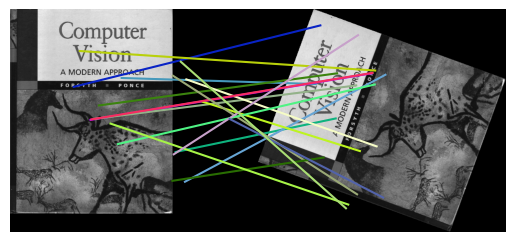

80
90
100
110
120
130
140
150
160
170
180
190


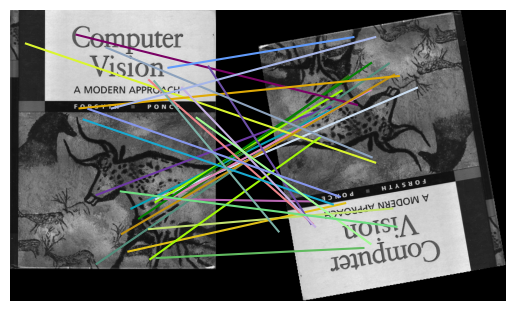

200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350


In [84]:
# Initialize histogram
histogram = []
iter = 0
# Match features for rotated images and update histogram
for i in range(0,360,10):
    # Rotate image
    print(i)
    rotated_cv_cover = scipy.ndimage.rotate(cv_cover, i)
    # Compute features, descriptors and match features
    matches, locs1, locs2 = matchPics(rotated_cv_cover, cv_cover)
    
    # Update histogram
    for r in range(len(matches)):
        histogram.append(i)
    
    # Display feature matching result for specific orientations
    if i == 10 or i == 70 or i == 190:
        plotMatches(cv_cover, rotated_cv_cover, matches, locs1, locs2)

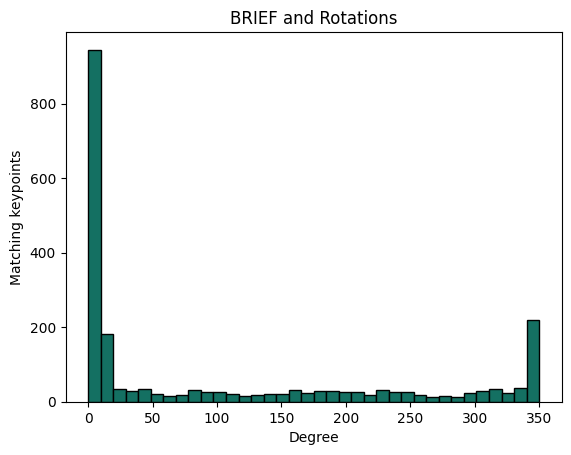

In [85]:
# Display histogram
plt.hist(histogram
         ,color = '#147062' # 바 색 변경
         ,edgecolor = 'black' # 선으로 구분
         ,linewidth = 1 # 선 굵기 설정
         , bins=36)
plt.title('BRIEF and Rotations')
plt.xlabel('Degree')
plt.ylabel('Matching keypoints')
plt.show()